In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [2]:
df_houses = pd.read_pickle("houses_dataframe_cleaned.pkl")

In [3]:
df_houses.head()

,address,zipcode,sale_price,beds,baths,house_sqft,lotsize,year_built
0,2934 South Bellaire Street,80222,463500,2,1,725,7150,1949
1,1885 West Stoll Place,80221,500000,2,1,987,5720,1947
2,5179 Clay Street,80221,540000,2,2,1045,6250,1941
3,1115 Cook Street,80206,775000,3,2,1893,4459,1910
4,3318 Gilpin Street,80205,756500,3,2,2450,3390,1890


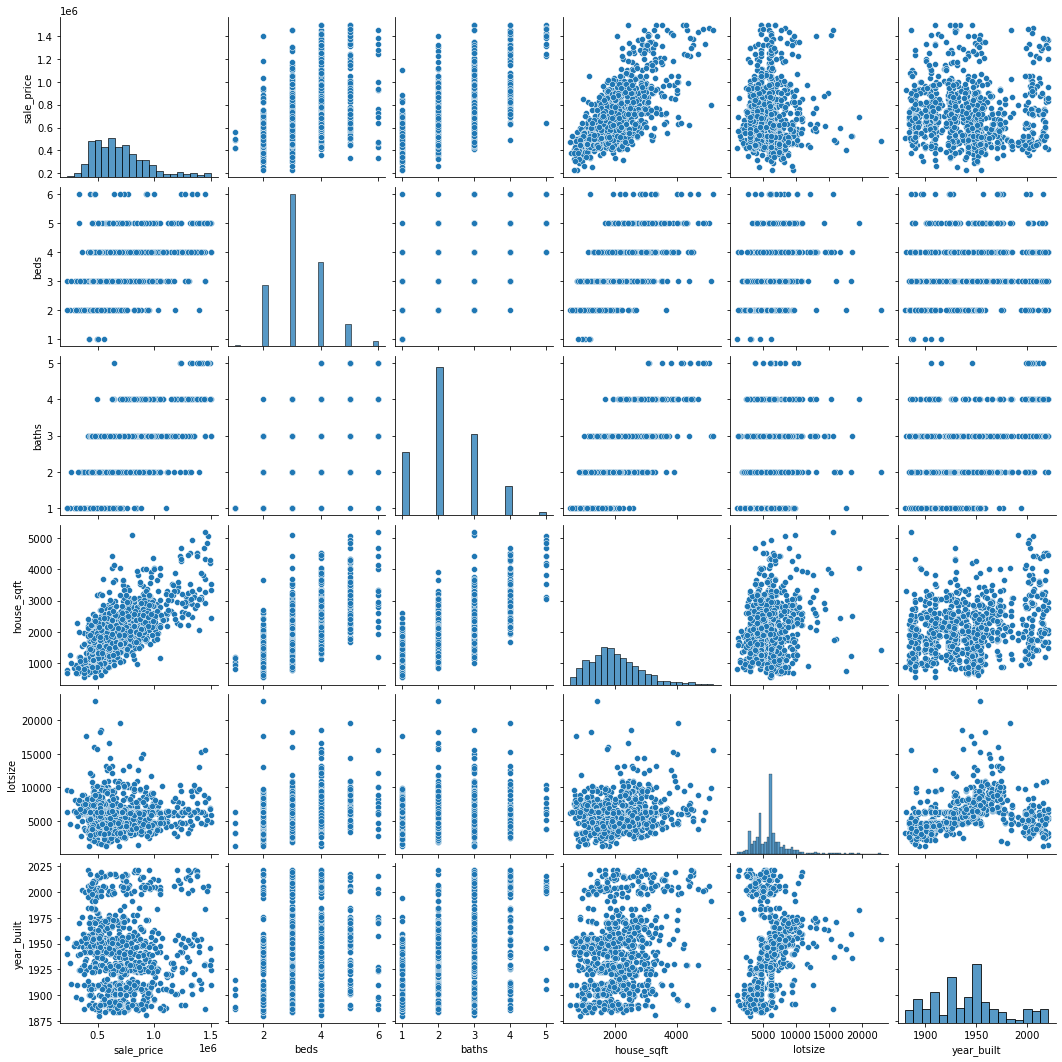

In [4]:
sns.pairplot(df_houses);

In [5]:
# Check how many zipcode count/distribution before creating zipcode dummy variable 

df_houses["zipcode"].value_counts()

80205    143
80220    126
80211    121
80219     69
80206     65
80249     58
80210     56
80221     53
80204     45
80231     38
80223     37
80209     31
80238     24
80212     23
80207     22
80224     18
80222     18
80239     14
80230      8
80237      7
80229      7
80218      6
80246      5
80247      3
80235      2
80203      2
80236      2
80110      2
80260      1
Name: zipcode, dtype: int64

In [6]:
df_houses["zipcode"].value_counts().sum()

1006

In [7]:
# Assign infrequent zipcodes to 'Other' category

df_houses["zipcode"].replace(["80218","80246","80247","80235","80203","80236","80110","80260"], 
                              "Other", inplace = True)

In [8]:
# Get dummy variables for zipcode

X = pd.get_dummies(df_houses, columns = ["zipcode"], drop_first = True).drop(["address","sale_price"], axis =1)
y = df_houses["sale_price"]

In [9]:
# Create function to iteratively check model metrics... 
# ...(determined to use only simple linear regression model during baseline model training)

def model_compare(X,y):
    
    X, x_test, y, y_test = train_test_split(X, y, test_size = .2, random_state = 10)
    
    lm = LinearRegression()
    print(f"Simple cv r^2: {cross_val_score(lm, X, y, cv = 5, scoring = 'r2')}")
    print(f"Simple cv mean r^2: {np.mean(cross_val_score(lm, X, y, cv = 5, scoring = 'r2'))}")
    
    lm.fit(X, y)
    preds = lm.predict(X)
    print(f"Simple cv MAE: {mean_absolute_error(y, preds)}")

In [10]:
# 12% increase in r^2 value and $21K decrease in MAE compared to baseline model

model_compare(X,y)

Simple cv r^2: [0.71333151 0.63858783 0.71531909 0.73410024 0.73966919]
Simple cv mean r^2: 0.7082015741637201
Simple cv MAE: 93544.52085501803


In [11]:
# Explore feature interaction terms to increase model performance

X["beds x baths"] = X["beds"] * X["baths"]
X["beds x sf"] = X["beds"] * X["house_sqft"]
X["lot x year"] = X["lotsize"] * X["year_built"]
X["sf per lot"] = X["house_sqft"] / X["lotsize"]

In [12]:
# Subtle increase in model performance incorporating interaction terms 

model_compare(X,y)

Simple cv r^2: [0.70832832 0.65077712 0.71883956 0.72973076 0.74565472]
Simple cv mean r^2: 0.7106660952543067
Simple cv MAE: 92404.41574161919


In [13]:
# Train-test split in order to score test set

X, X_test, y, y_test = train_test_split(X, y, test_size = .2, random_state = 10)

Simple test set r^2: 0.6786011845771105
Simple test set MAE: 110755.32096706088


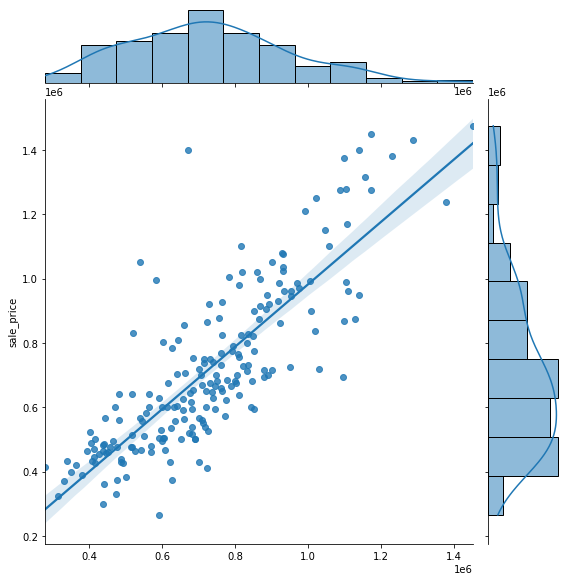

In [14]:
lm = LinearRegression()

lm.fit(X, y)
preds = lm.predict(X_test)

print(f"Simple test set r^2: {lm.score(X_test, y_test)}")
print(f"Simple test set MAE: {mean_absolute_error(y_test, preds)}")

sns.jointplot(x = preds, y = y_test, kind = 'reg', height = 8);

In [15]:
# feature coefficients for test set

list(zip(X_test.columns, lm.coef_))

[('beds', -26200.642378882916),
 ('baths', 84704.08602559337),
 ('house_sqft', 118.93028669901804),
 ('lotsize', 376.8295375692406),
 ('year_built', 551.9846453485402),
 ('zipcode_80205', 24666.943811173667),
 ('zipcode_80206', 128788.68012153052),
 ('zipcode_80207', 42693.49017277844),
 ('zipcode_80209', 226046.18930269245),
 ('zipcode_80210', 133768.3901491315),
 ('zipcode_80211', 82806.70049882434),
 ('zipcode_80212', 28351.723868300756),
 ('zipcode_80219', -97590.65822002401),
 ('zipcode_80220', 95266.71650880875),
 ('zipcode_80221', -40086.79776607495),
 ('zipcode_80222', -5028.645074260485),
 ('zipcode_80223', 22243.42930876632),
 ('zipcode_80224', -51723.22972459637),
 ('zipcode_80229', -175501.66505693534),
 ('zipcode_80230', -57724.345985876964),
 ('zipcode_80231', -156238.69844919947),
 ('zipcode_80237', -144866.00189089868),
 ('zipcode_80238', -46316.93686776341),
 ('zipcode_80239', -231034.3602434022),
 ('zipcode_80249', -234834.87174909614),
 ('zipcode_Other', -8544.625343